In [24]:
#dependencies
from __future__ import print_function
import datetime as dt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline
import scipy.stats as stats
style.use('ggplot')


In [4]:
def get_return(tickers, start, end, log_return=True):
    data = web.DataReader(tickers, 'yahoo', start, end)['Adj Close']
    data = data.sort_index()
    
    if log_return:
        daily_return = np.log(data.pct_change()+1)
        
    else:
        daily_return = data.pct_change()
        
    daily_return.fillna(0, inplace=True)
    
    return daily_return

start = dt.datetime(2018,1,1)
end = dt.datetime(2018,12,31)

#list of stock in portfolio
tickers = ['BTC-USD', 'LTC-USD', 'ETH-USD']

In [5]:
daily_return = get_return(tickers, start, end, log_return=True)

daily_return['Date'] = daily_return.index
df = daily_return.reset_index(drop=True)

#reorganize columns
df = df[['Date', 'BTC-USD', 'ETH-USD', 'LTC-USD']]


df.head()

Symbols,Date,BTC-USD,ETH-USD,LTC-USD
0,2018-01-01,0.000000,0.000000,0.000000
1,2018-01-02,0.092925,0.130915,0.115512
2,2018-01-03,0.026914,0.087829,-0.028928
3,2018-01-04,0.001547,0.003956,-0.026216
4,2018-01-05,0.110566,0.023328,0.025726


In [6]:
#change DF to numeric
df['BTC-USD'] = pd.to_numeric(df['BTC-USD'])
df['ETH-USD'] = pd.to_numeric(df['ETH-USD'])
df['LTC-USD'] = pd.to_numeric(df['LTC-USD'])



#change df to show whole numbers
btc_percent = df["BTC-USD"]*100
ltc_percent = df["LTC-USD"]*100
eth_percent = df["ETH-USD"]*100

df["BTC%"] = btc_percent
df["LTC%"] = ltc_percent
df["ETH%"] = eth_percent



df.head()

Symbols,Date,BTC-USD,ETH-USD,LTC-USD,BTC%,LTC%,ETH%
0,2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-01-02,0.092925,0.130915,0.115512,9.292468,11.551208,13.091453
2,2018-01-03,0.026914,0.087829,-0.028928,2.691437,-2.892794,8.782894
3,2018-01-04,0.001547,0.003956,-0.026216,0.154664,-2.621649,0.395566
4,2018-01-05,0.110566,0.023328,0.025726,11.056571,2.572579,2.332789


In [7]:
#new df with my % change 
final= df[['Date','BTC%', 'ETH%', 'LTC%']]
final.head()

Symbols,Date,BTC%,ETH%,LTC%
0,2018-01-01,0.000000,0.000000,0.000000
1,2018-01-02,9.292468,13.091453,11.551208
2,2018-01-03,2.691437,8.782894,-2.892794
3,2018-01-04,0.154664,0.395566,-2.621649
4,2018-01-05,11.056571,2.332789,2.572579


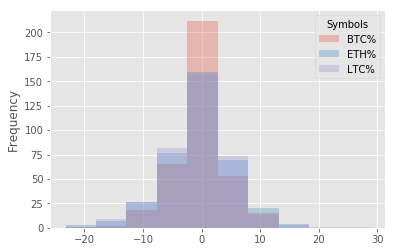

In [8]:
final.plot(kind='hist',x='Date', alpha= 0.3 )

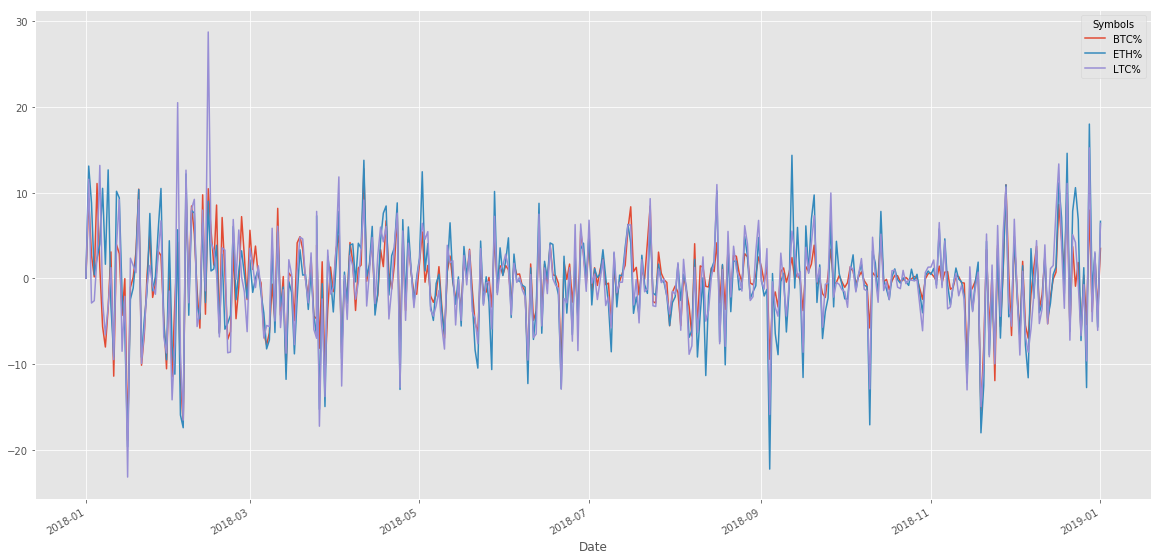

In [9]:
#Update alphas

final.plot(kind='line', x='Date', y=['BTC%','ETH%', 'LTC%'],legend=True, figsize=(20,10))



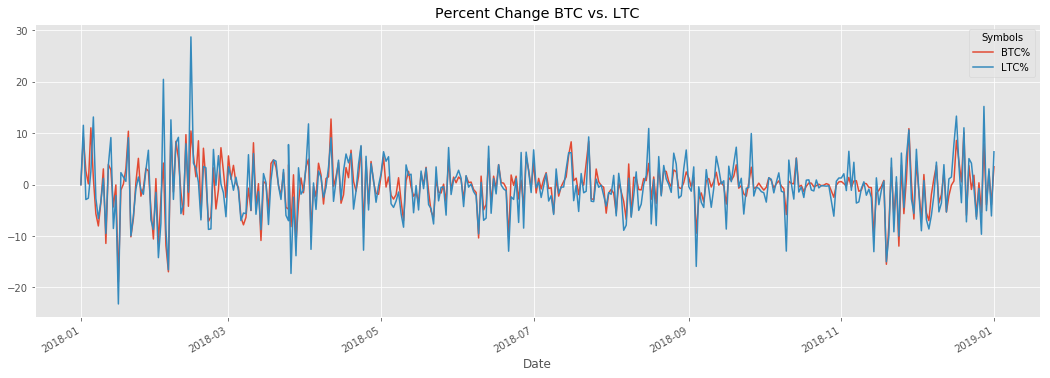

In [10]:

final.plot(kind='line', x='Date', y=['BTC%', 'LTC%'],legend=True, figsize=(18,6), title='Percent Change BTC vs. LTC')


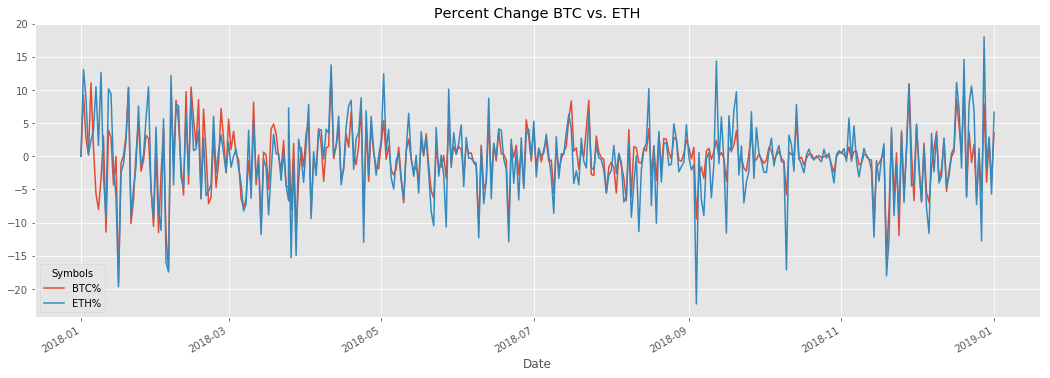

In [11]:
final.plot(kind='line', x='Date', y=['BTC%', 'ETH%'],legend=True, figsize=(18,6), title='Percent Change BTC vs. ETH')

In [12]:
#thoughts about pvalues for each of the categories
#chi values


In [13]:
final.mean()

Symbols
BTC%   -0.339542
ETH%   -0.455694
LTC%   -0.531061
dtype: float64

In [14]:
#create mean in dataframe
#change df to show whole numbers
mean = final.mean(axis=1)

final['Mean'] = mean
final.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Symbols,Date,BTC%,ETH%,LTC%,Mean
0,2018-01-01,0.000000,0.000000,0.000000,0.000000
1,2018-01-02,9.292468,13.091453,11.551208,11.311710
2,2018-01-03,2.691437,8.782894,-2.892794,2.860513
3,2018-01-04,0.154664,0.395566,-2.621649,-0.690473
4,2018-01-05,11.056571,2.332789,2.572579,5.320646


In [15]:
#copydf


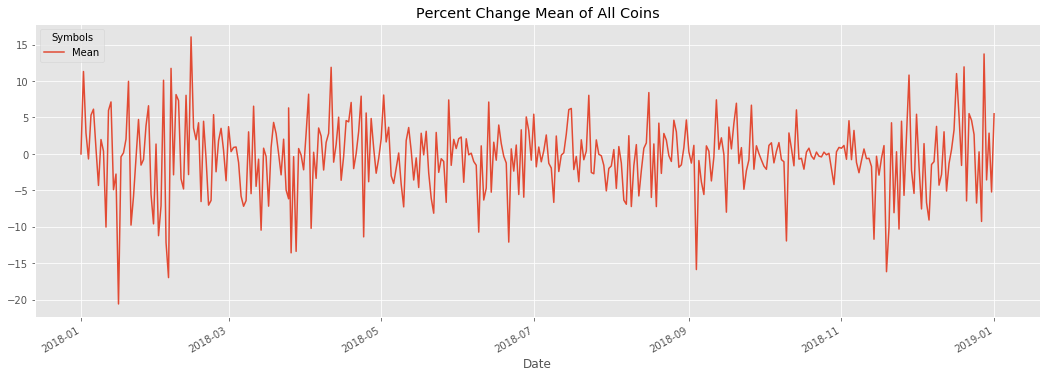

In [16]:
final.plot(kind='line', x='Date', y=['Mean'],legend=True, figsize=(18,6), title='Percent Change Mean of All Coins')

In [17]:
#new DF
multiplot = final

multiplot['Date'] = pd.to_numeric(multiplot['Date'])


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


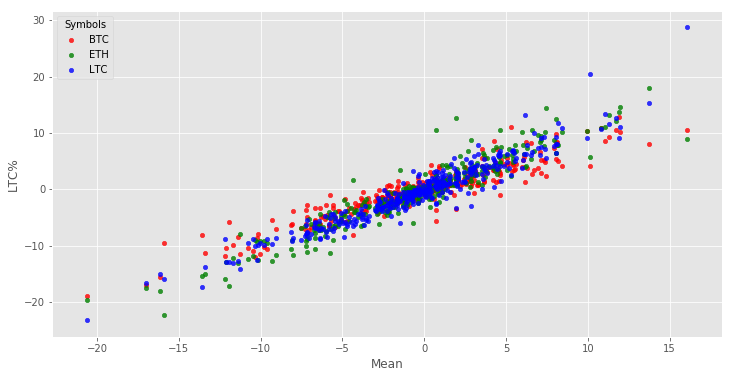

In [18]:
ax1 = multiplot.plot(kind='scatter', x='Mean', y='BTC%', color='r', label="BTC", alpha=.8)    
ax2 = multiplot.plot(kind='scatter', x='Mean', y='ETH%', color='g', label="ETH",alpha=.8, ax=ax1)    
ax3 = multiplot.plot(kind='scatter', x='Mean', y='LTC%', color='b', label="LTC", alpha=.8,ax=ax1, figsize=(12,6))

#print(ax1 == ax2 == ax3)  # True
#plt.print

In [19]:
final.head()

Symbols,Date,BTC%,ETH%,LTC%,Mean
0,1514764800000000000,0.000000,0.000000,0.000000,0.000000
1,1514851200000000000,9.292468,13.091453,11.551208,11.311710
2,1514937600000000000,2.691437,8.782894,-2.892794,2.860513
3,1515024000000000000,0.154664,0.395566,-2.621649,-0.690473
4,1515110400000000000,11.056571,2.332789,2.572579,5.320646


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18abc8d0>,
      dtype=object)

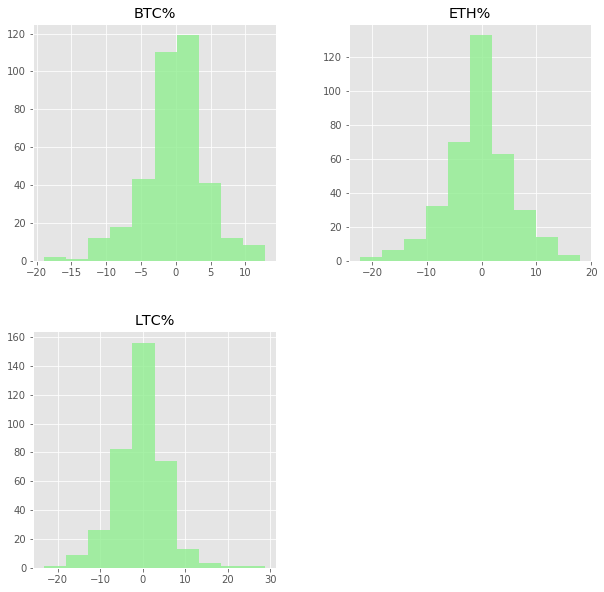

In [20]:
color=['red', 'blue', 'green']
final.hist(column=['BTC%', 'ETH%','LTC%'], figsize=(10,10), alpha=.8, color='lightgreen')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18e996d8>]],
      dtype=object)

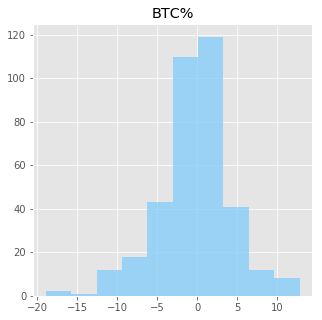

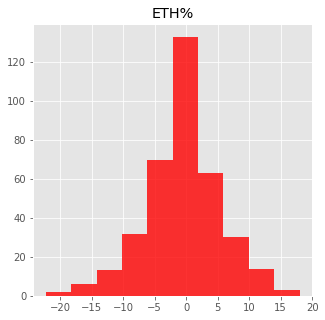

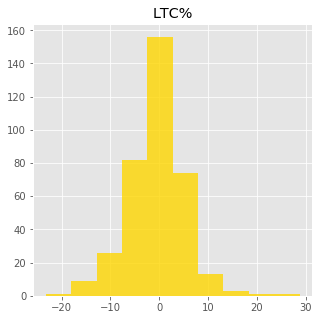

In [21]:
final.hist(column=['BTC%'], figsize=(5,5), alpha=.8, color='lightskyblue')
final.hist(column=['ETH%'], figsize=(5,5), alpha=.8, color='red')
final.hist(column=['LTC%'], figsize=(5,5), alpha=.8, color='gold')

In [26]:
# Calculating the p value
BTC_P = final["BTC%"]
ETH_P = final["ETH%"]

stats.ttest_ind(BTC_P, ETH_P, equal_var=False)

Ttest_indResult(statistic=0.3036003765621456, pvalue=0.7615254554418593)

In [27]:
group1 = final["BTC%"]
group2 = final["ETH%"] 
group3 = final["LTC%"]

stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=0.11832556492670598, pvalue=0.888418129265546)